## Functions

$f(x)=x²$

In [145]:
f(x) = x*x

In [146]:
f(2)

4

### Parentheses are optional

In [147]:
f 2

4

In [148]:
square = f

In [149]:
square 2 

4

### Function with multiple arguments

In [150]:
plus x y = x+y

In [151]:
plus 2 3

5

In [152]:
3 `plus` 4

7

In [153]:
square plus 2 3

Non type-variable argument in the constraint: Num (a -> a -> a)
(Use FlexibleContexts to permit this)
When checking that `it' has the inferred type
  it :: forall a. (Num a, Num (a -> a -> a)) => a

In [154]:
square (plus 2 3)

25

### Function as argument

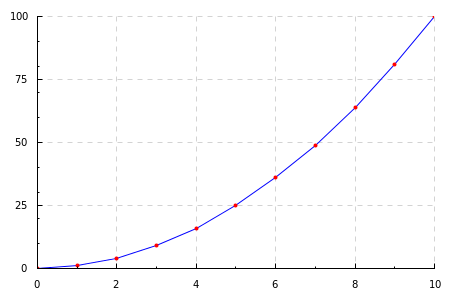

In [155]:
plot square

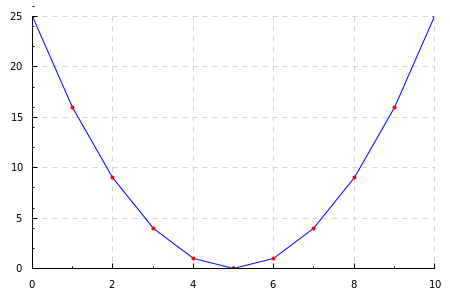

In [156]:
plot ( \x -> square (x - 5) )

In [157]:
twice f x = f (f x) 

In [158]:
twice square 3

81

### Functions can be partial
This is called _currying_

In [159]:
power4 = twice square

power4 2

16

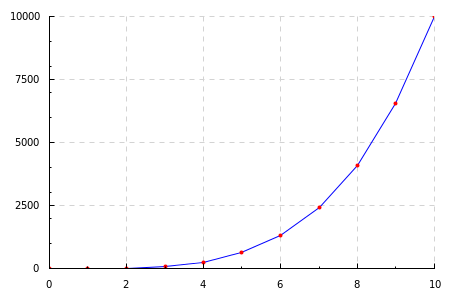

In [160]:
plot (twice square)

In [161]:
inc = plus 1

In [162]:
inc 4

5

In [163]:
(plus 1) 4

5

In [164]:
:t square

square :: forall a. Num a => a -> a

In [165]:
:t plus

plus :: forall a. Num a => a -> a -> a

Infix notation

In [166]:
1 `plus` 2 

3

In [167]:
(1 `plus`) 2

3

### A function can return a function

In [168]:
compose f g = \x -> f(g(x))

In [169]:
ps = compose square inc

In [170]:
ps 4

25

###  Operators are functions

In [171]:
(§) x y = (square x) `plus` y

In [172]:
2 § 2 § 4

40

In [173]:
($) = compose

In [174]:
ps = square $ inc

$ps(x)=(x+1)²$

In [175]:
ps 4

25

In [176]:
(.) f g = g $ f

In [177]:
(inc . square) 4

25

In [178]:
(>>) x f = f x

In [179]:
4 >> square

16

In [180]:
4 >> (inc . square)

25

In [181]:
4 >> inc >> square

25

### Pattern matching

In [182]:
guess 5 = "yes!"

In [183]:
guess 3

<interactive>:1:1-16: Non-exhaustive patterns in function guess

In [184]:
guess 5

"yes!"

In [185]:
guess 4 = "almost"

In [186]:
guess 4

"almost"

In [187]:
guess 5

<interactive>:1:1-18: Non-exhaustive patterns in function guess

In [188]:
guess 4 = "almost"
guess 5 = "yes!"
guess 6 = "almost"

In [189]:
guess 6

"almost"

In [190]:
guess 4 = "almost"
guess 5 = "yes!"
guess 6 = "almost"
guess x = "no!"

### Recursive function

In [191]:
fac 0 = 1
fac x = x*fac(x-1)

In [192]:
fac 4

24

In [193]:
sn 0 = 0
sn x = x+sn(x-1)

In [194]:
sn 5

15

$fac(x) = repeat(*, 1, x)$

$sn(x) = repeat(+, 0, x)$

In [195]:
repeat f p 0 = p
repeat f p x = f (repeat f p (x-1)) x

In [196]:
sn = repeat plus 0

In [197]:
sn 5

15

In [198]:
fac = repeat (*) 1

In [199]:
fac 4

24

In [200]:
:t repeat

repeat :: forall a t. (Eq a, Num a) => (t -> a -> t) -> t -> a -> t

In [201]:
:t compose

compose :: forall t t1 t2. (t1 -> t) -> (t2 -> t1) -> t2 -> t

## Data types

In [202]:
data Pair a b = Pair a b deriving IHaskellPrelude.Show

In [203]:
ones = Pair 1 1

In [204]:
ones

Pair 1 1

In [205]:
pplus (Pair a b) (Pair c d) = Pair (a+c) (b+d)

In [206]:
pplus ones (Pair 2 3)

Pair 3 4

In [207]:
data Bool = True | False deriving IHaskellPrelude.Show

In [208]:
isz (Pair 0 0) = True
isz (Pair x y) = False

In [209]:
isz ones

False

In [210]:
isz (Pair 0 0)

True

### Collections

In [211]:
data List a = L a (List a) | Empty deriving IHaskellPrelude.Show

In [212]:
l = L 1 (L 2 (L 3 Empty))

In [213]:
l

L 1 (L 2 (L 3 Empty))

how to define the head function?

In [214]:
data Maybe a = Just a | Nothing deriving IHaskellPrelude.Show

In [215]:
head Empty = Nothing
head (L h t) = Just h

In [216]:
head l

Just 1

In [217]:
tail Empty = Nothing
tail (L h t) = Just t

In [218]:
tail l

Just (L 2 (L 3 Empty))

In [219]:
tail (L 23 Empty)

Just Empty

In [220]:
second x = head (tail x)

Couldn't match expected type `List a' with actual type `Maybe (List t)'
Relevant bindings include
  x :: List t (bound at <interactive>:1:8)
  second :: List t -> Maybe a (bound at <interactive>:1:1)
In the first argument of `head', namely `(tail x)'
In the expression: head (tail x)

In [221]:
:t tail

tail :: forall t. List t -> Maybe (List t)

In [222]:
:t head

head :: forall a. List a -> Maybe a

In [223]:
mhead Nothing = Nothing
mhead (Just x) = head x

In [224]:
mtail Nothing = Nothing
mtail (Just x) = tail x

In [225]:
mtail (Just (L 1 Empty))

Just Empty

In [226]:
second x = mhead (mtail (Just x))

In [227]:
second l

Just 2

In [228]:
second Empty

Nothing

## Well, this is not practical to define all these "m" functions, no?

In [229]:
mbind f Nothing = Nothing
mbind f (Just x) = f x

In [230]:
mwrap x = Just x

In [231]:
second x = (mbind head) ((mbind tail ) (mwrap x))

In [232]:
second l

Just 2

In [233]:
:t mbind

mbind :: forall t a. (t -> Maybe a) -> Maybe t -> Maybe a

In [234]:
:t (+)

(+) :: forall a. Num a => a -> a -> a

In [235]:
second = mwrap . (mbind tail) . (mbind head)

In [236]:
second l

Just 2

In [237]:
mcompose f g = mwrap . (mbind g) . (mbind f)

In [238]:
second = mcompose head tail

In [239]:
second l

Just 2

In [240]:
(%) f g = mcompose g f

In [241]:
l >> (tail % tail % head)

Just 3

In [242]:
5 >> (mwrap % mwrap % mwrap)

Just 5

In [243]:
inc (second l)

Non type-variable argument in the constraint: Num (Maybe a)
(Use FlexibleContexts to permit this)
When checking that `it' has the inferred type
  it :: forall a. (Num a, Num (Maybe a)) => Maybe a

In [244]:
mmap f Nothing = Nothing
mmap f (Just x) = Just (f x)

In [245]:
mmap inc (second l)

Just 3

# More List Functions 

In [246]:
lmap f Empty = Empty
lmap f (L h t) = L (f h) (lmap f t)

In [247]:
lmap square l

L 1 (L 4 (L 9 Empty))

In [248]:
concat Empty Empty = Empty
concat x Empty = x
concat Empty x = x
concat (L h t) x = L h (concat t x)

In [249]:
concat l l

L 1 (L 2 (L 3 (L 1 (L 2 (L 3 Empty)))))

In [250]:
cdown 0 = L 0 Empty
cdown x = L x (cdown (x-1))

In [251]:
cdown 3

L 3 (L 2 (L 1 (L 0 Empty)))

In [252]:
lmap cdown l

L (L 1 (L 0 Empty)) (L (L 2 (L 1 (L 0 Empty))) (L (L 3 (L 2 (L 1 (L 0 Empty)))) Empty))

In [253]:
flatten Empty = Empty
flatten (L h t) = concat h (flatten t)

In [254]:
flatten (lmap cdown l)

L 1 (L 0 (L 2 (L 1 (L 0 (L 3 (L 2 (L 1 (L 0 Empty))))))))

In [255]:
flatmap f x = flatten (lmap f x)

In [256]:
flatmap cdown l

L 1 (L 0 (L 2 (L 1 (L 0 (L 3 (L 2 (L 1 (L 0 Empty))))))))

In [257]:
lwrap x = (L x Empty)

In [258]:
ccdown = lwrap . (flatmap cdown) . (flatmap cdown)

In [259]:
ccdown 3

L 3 (L 2 (L 1 (L 0 (L 2 (L 1 (L 0 (L 1 (L 0 (L 0 Empty)))))))))

In [260]:
lbind = flatmap

In [261]:
join f g = lwrap . (lbind f)  . (lbind g)

In [262]:
ccdown = join cdown cdown

In [263]:
ccdown 3

L 3 (L 2 (L 1 (L 0 (L 2 (L 1 (L 0 (L 1 (L 0 (L 0 Empty)))))))))

In [264]:
(&) f g = join g f

In [265]:
3 >> (cdown & cdown & cdown)

L 3 (L 2 (L 1 (L 0 (L 2 (L 1 (L 0 (L 1 (L 0 (L 0 (L 2 (L 1 (L 0 (L 1 (L 0 (L 0 (L 1 (L 0 (L 0 (L 0 Empty)))))))))))))))))))

In [266]:
3 >> (lwrap & lwrap & lwrap) 

L 3 Empty